# Analysis of the success patterns of games and platforms

We work in an online store that sells computer games worldwide. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. Through analysis, we need to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

We have data up to 2016. Let's say it's December 2016 and we're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn’t matter if we are forecasting sales for 2017 based on 2016 data or 2027 based on 2026 data.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age rating.

<div style="border:solid green 2px; padding: 20px">
    
**Project Plan**
    
**Our goal** - perform data pre-processing, conduct exploratory analysis to identify patterns of game success, create a user profile for each region and perform hypothesis testing.
    
**Project Implementation Plan:**
    
1. Open data file and explore general information    
    
    
2. Data pre-processing:
    
    - change columns' names (convert to lowercase)
    
    - convert data to desired types
    
    - check the gaps (if needed)
    
    - calculate the total sales in all regions, display them in a separate column.    
    
    
3. Data discovery:
    
    - check how many games were released in different years; find out if the data is important for all periods.
    
    - check how sales have changed across the platforms
    
    - determine the relevant period for further analysis based on the results of the previous issues' study. The main factor: these data will help build a forecast for 2017.
    
    - find out which platforms are leading in sales, increase or decrease. We will select several potentially profitable platforms.
    
    - create a box-plot of global game sales by platform
    
    - check how sales within one popular platform are influenced by user reviews and critics. Creation a scatterplot and calculate the correlation between reviews and sales.
    
    - correlate the findings with game sales on other platforms
    
    - analyze the overall distribution of games by genre.    
    
    
4. Create a user portrait for each region, determine for the user of each region (NA, EU, JP):
    
    - the most popular platforms (top-5)
    
    - the most popular genres (top-5)
    
    - check if the ESRB rating affects sales in a particular region    
    
    
5. Hypothesis testing:
    
    - the average user ratings of the Xbox One and PC platforms are the same
    
    - average user ratings for Action and Sports are different   
    
    
6. Conclusion
    
    
**Data description:**
    
* 		`Name`
* 		`Platform`
* 		`Year_of_Release` 
* 		`Genre` 
* 		`NA_sales` — sales in North America (millions of sold copies)
* 		`EU_sales` — sales in Europe
* 		`JP_sales` — sales in Japan
* 		`Other_sales` — sales in another countries
* 		`Critic_Score` — score of critics (max 100)
* 		`User_Score` — score of user (max 10)
* 		`Rating` — rating ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Data Pre-Processing

### General info

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# open file and save as data
try:
    data = pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Project 1/games.csv')
except OSError as error:
    print(error)

In [3]:
# display the first 10 rows of the dataframe
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# display the basic information of the dataframe using the info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can see that there are a small number of gaps in the `Year_of_Release` column with the release year, about half of the data is missing in the `Critic_Score` column, and about 1/3 of the data is missing in the `User_Score` and `Rating` columns.

In [5]:
# convert all column names to lowercase
data.columns = data.columns.str.lower()

### Gaps processing

In [6]:
# check the dataframe for obvious duplicates
data.duplicated().sum()

0

In [8]:
# check all unique values of column Year_of_Release
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])


There are not so many gaps in the `Year_of_Release` column - no more than 2% of the total database. 

We will consider them outliers so that we can further convert the column format to `int`, since the year can only be an integer, while in this study this column has a categorical value, but not a quantitative one.

In [9]:
# get rid of outliers in year_of_release column
data = data.dropna(subset=['year_of_release'])
# change column type to int
data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
# delete rows with missing data in the Name and Genre columns from the data 
# this will not affect further data analysis
data = data.dropna(subset=['name', 'genre'])

In [11]:
# check the unique values of the user_score column
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)


Find the number of gaps in the `User_Score` column - gaps with values `tbd` and `nan`.

In [12]:
# check the number of gaps with the value `tbd`
user_score_tbd_total = len(data[data['user_score'] == 'tbd'])
user_score_tbd_total

2376

In [13]:
# check the number of gaps with the value `nan`
data['user_score'].isna().sum()

6605

Typically, `tbd` means `to be defined`, `to be determined`, `to be discussed` (depending on the context).

In our case, `to be defined` is more suitable. These gaps can be replaced with `nan` because replacing them with the median or mean does not seem logical for further analysis.

We will leave the gaps in the `critic_score` and `rating` columns unchanged so as not to throw out more than half of the data from the analysis. But let's check further all the unique values of these columns.

In general, such a large number of omissions may have been influenced by initially omitted information that was not provided. Or, if the rating data was downloaded from third-party sites (services) or databases, then there is also a technical factor, especially since gaps occur immediately in 3 columns with ratings at the same time.

In [14]:
# replace tbd values with nan
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.NaN
# change column type to float64
data['user_score'] = data['user_score'].astype(float)

In [15]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [16]:
# check all unique values of the platform name column
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<div style="border:solid green 2px; padding: 20px">
The variety of platforms is confirmed by the release date of the games, as well as the user region.

In [17]:
# check the unique values of the column with the rating from the ESRB organization
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 <div style="border:solid green 2px; padding: 20px">
 
 Let's go through the rating categories:
 
  - 'E' - game without age limit
  - 'M' - game with age limit 17+
  - 'T' - game with age limit 13+
  - 'E10+' - game with age limit 10+ (earlier rating was called 'K-A')
  - 'K-A' - game with age limit 10+
  - 'AO' - "adults only" - game with age limit 18+
  - 'EC' - a game for preschool children (this rating has not been assigned since 2018)
  - 'RP' - game not yet rated by ESRB
    
Accordingly, all games with a score of "K-A" can be replaced with a relevant score of "E10+".


In [18]:
# replace "K-A" with "E10+"
data.loc[data['rating'] == 'K-A', 'rating'] = 'E10+'

In [19]:
# check the unique values of the game genres column
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [20]:
# check the unique values of critic scores column
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [21]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


No duplicates were found among the values of the `platform` and `genre` columns to eliminate them.
    
The minimum critic score is 13, the maximum score is 98, the average score is 68, and the median score is 71. The difference in mean and median scores is insignificant. Ranking from 0 to 100.
    
The minimum user rating is 0, the maximum rating is 9.7. Mean value - 7.1, median - 7.5. The mean and median are not very different from each other. Ranking from 0 to 10.

### Total sales by region


Let's calculate the total sales in all regions and write them down in a separate column `total_sales`.

In [22]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
# sort the table by the largest sales and display the first 10 rows with a new column
data.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Initially, we received 16,715 game listings with platform, release year, critic and user ratings, and sales data by region.

During data pre-processing, we:
    
- checked the dataframe for obvious duplicates (there are none);
    
    
- Performed gaps processing:
    
     - got rid of gaps in the `year_of_release` column, since there were less than 2% of them;
    
     - checked the unique values of all columns (duplicates were not found, but in the ESRB rating column we replaced the `"K-A"` rating with `"E10+"`, since the first category is no longer used);
    
     - gaps in the `critic_score` and `user_score` columns were left without filling with the median or average value in order to avoid worsening the quality of the analysis;
    
     - changed data type in some columns (`year_of_release` changed to `int`, `user_score` changed to `float`).
    
To complete the analysis, a column with total sales data was added to the table - Wii Sports (2006), Super Mario Bros. (1985), Mario Kart Wii (2008), Wii Sports Resort (2009) and Pokemon Red/Pokemon Blue (1996).

## Data Discovery

### Game releases by year

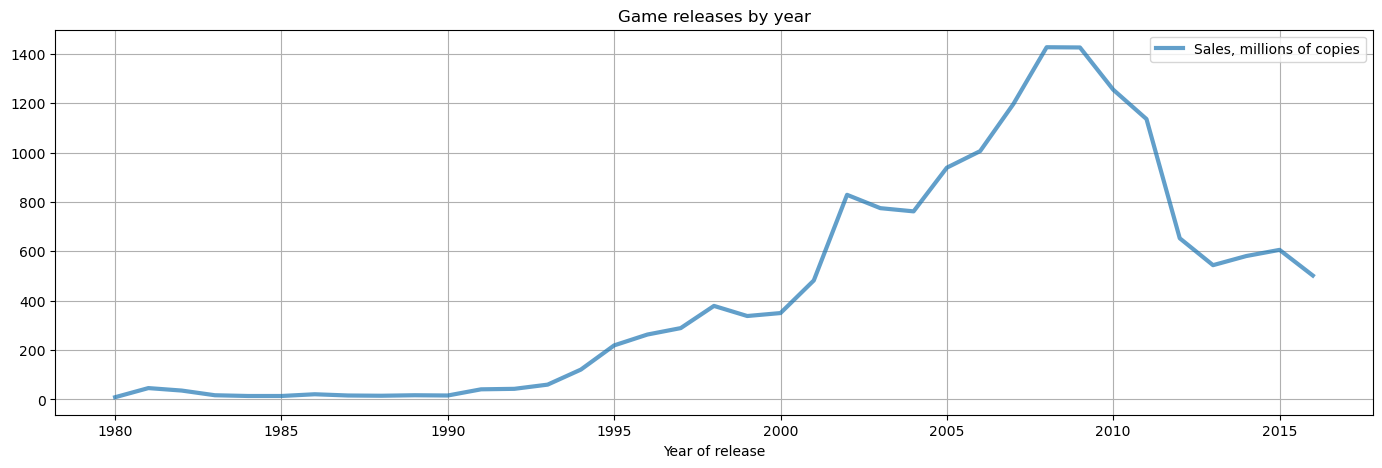

In [25]:
# let's group games by release date, and see how many games were released in a given year
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(17, 5), kind='line', title='Game releases by year', linewidth=3, alpha=0.7)
)
plt.xlabel('Year of release')
plt.legend(['Sales, millions of copies'])
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
The number of released games gradually increased. Stable growth will start from 1990.
    
The peak release of games falls on the period from 2002 to 2011. Overall, less than 100 games a year were released before 1994. Therefore, earlier than this period, the data are not as significant. Since 2012, there has been a sharp decrease in the release of games (almost 2 times), but then the release is stable.

### Game sales by platform

In [26]:
# let's group the data on the final sales depending on the platform, sorting in descending order
platform_total_sales = (data.groupby('platform')
                        .agg(total_sales=('total_sales', 'sum')).sort_values('total_sales', ascending=False)
                       )
# display the top 10 platforms that are leading in sales
platform_total_sales.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<div style="border:solid green 2px; padding: 20px">
    
The Top-10 platforms: PlayStation2, Xbox 360, PlayStation3, Wii (Nintendo), The Nintendo DS, PlayStation1, PlayStation4, Game Boy Advance (GBA), The PlayStation Portable (PSP) and The Nintendo 3DS.

In [27]:
# create a list of top-10 platforms
top_sales_platform = list(platform_total_sales.index[:10])

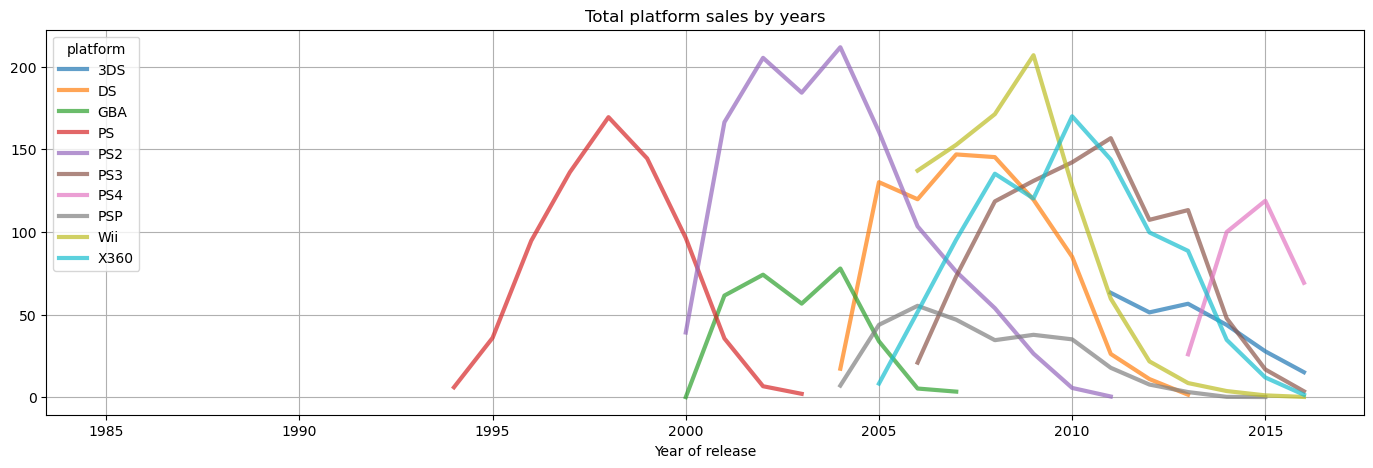

In [28]:
# create a distribution chart of the total sales of the top-10 platforms by year
(
    data.query('platform in @top_sales_platform')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(17, 5), kind='line', title='Total platform sales by years', linewidth=3, alpha=0.7)
)
plt.xlabel('Year of release')
plt.show()

<div style="border:solid green 2px; padding: 20px">

On average, the platforms have sales for 7-10 years. The peak of sales falls in the middle of their total period. There are several platforms such as GBA, PS2, DS, X360, PS3 that have reached peak sales twice in all time. Such peaks may occur during the release of certain popular games or their new versions (sequels).
    
The shortest sales duration (about 5 years) from the available data (until 2016) is for the 3DS and PS4 platforms.
    
The PS2 platform shows the largest sales volumes.

### Current period analysis

<div style="border:solid green 2px; padding: 20px">
    
It is necessary to determine the current period to build a forecast for 2017.
    
We will take data from 2014 to 2016 to track the latest up-to-date data on the ratings and sales of games on a particular platform.
    
It is worth noting that despite the decline in sales of some platforms during this period, we can still observe the peaks in sales of PS2 and X360, and at the same time the entry of such platforms as 3DS and PS4 into the market.

In [29]:
# create a separate dataframe with data older than 2014 
data_actual = data.query('year_of_release >= 2014')
# display information about the resulting dataframe
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


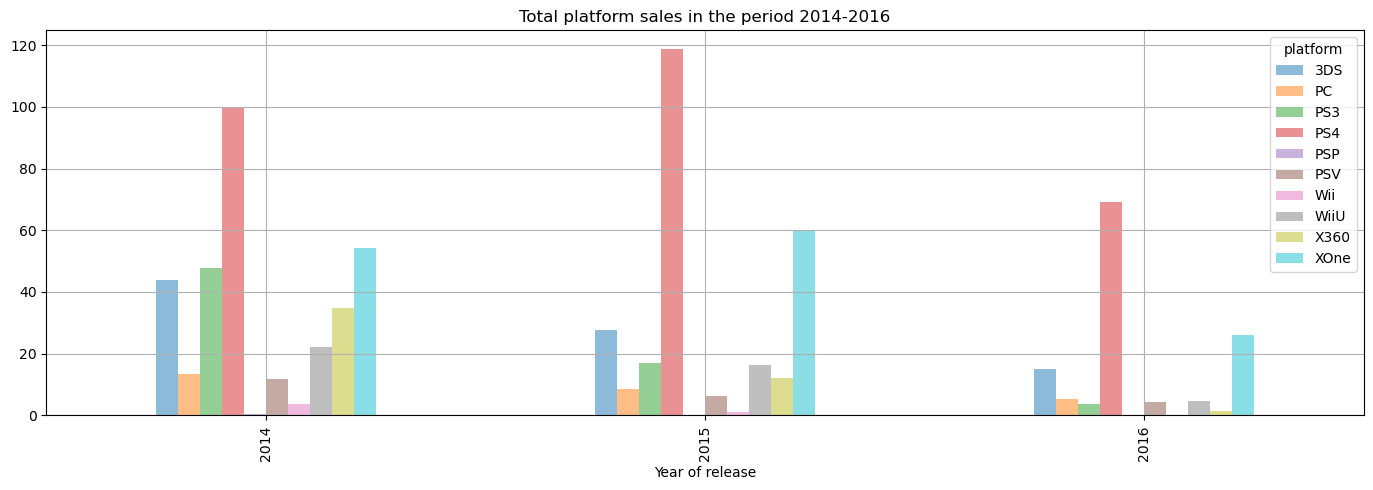

In [30]:
# create a chart of platforms with sales for the period 2014-2016 to track who is in the lead in this period
(
    data_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(17, 5), kind='bar', title='Total platform sales in the period 2014-2016', \
          linewidth=2, alpha=0.5)
)
plt.xlabel('Year of release')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
The leader in the period from 2014 to 2016 is the PS4, which was released at the end of 2013.
    
Next we see significant sales for the XOne platform, followed by the 3DS and PS3.

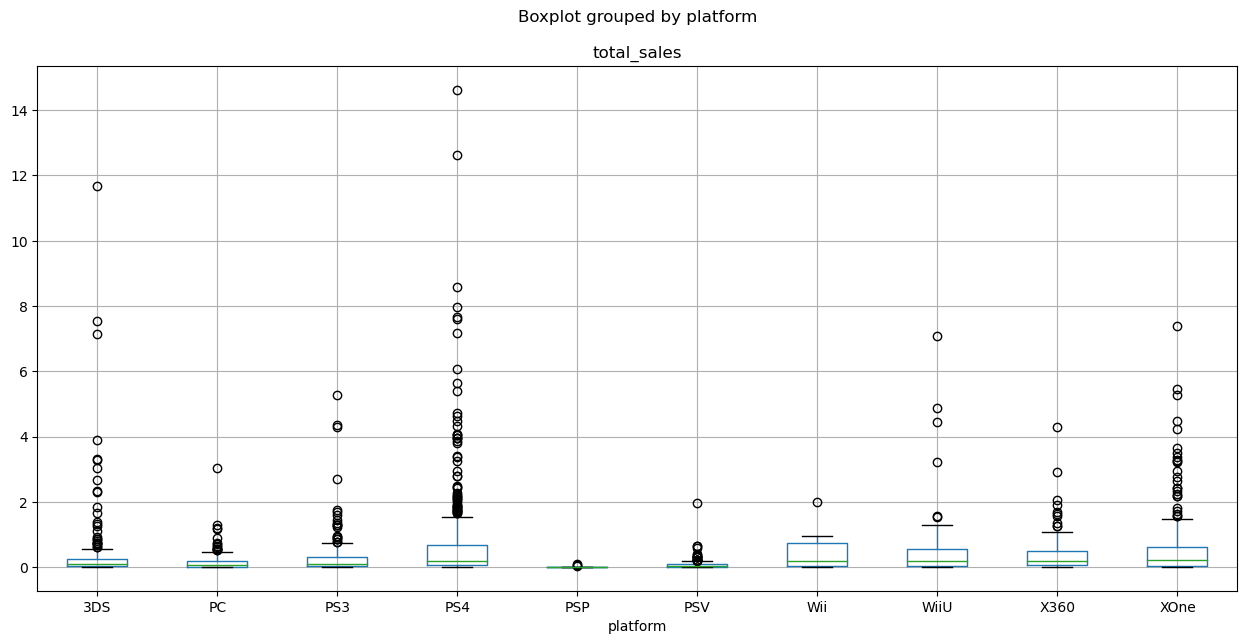

In [31]:
# create box-plot
data_actual.boxplot('total_sales', by='platform', figsize=(15,7))
plt.show()

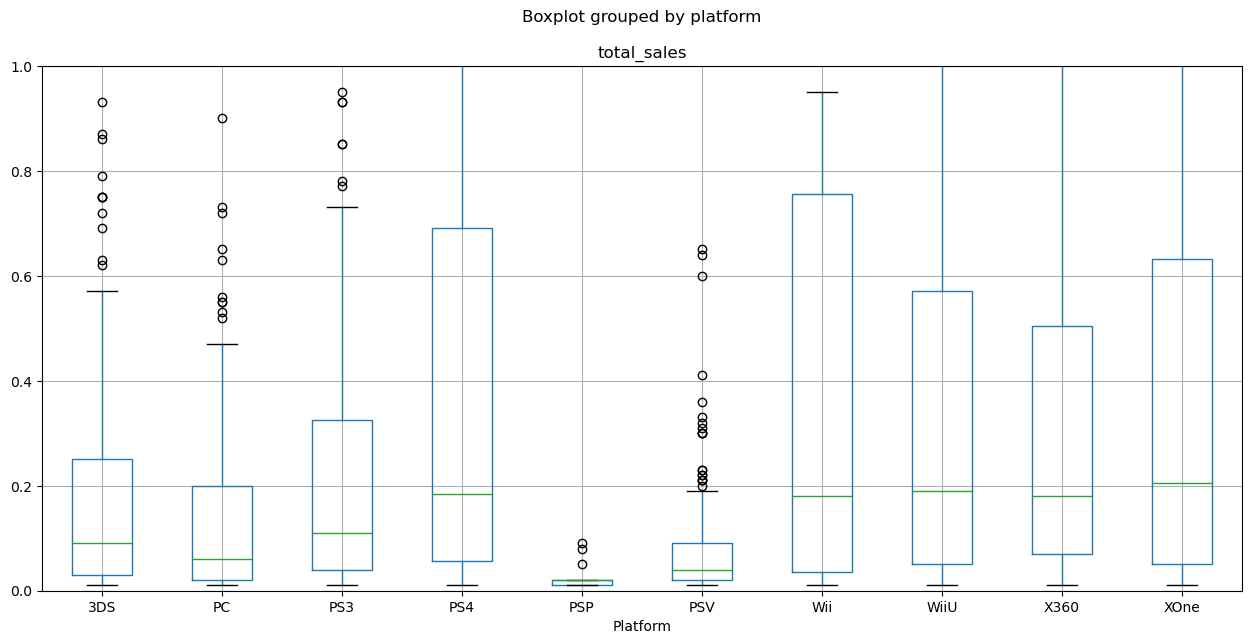

In [33]:
data_actual.boxplot('total_sales', by='platform', figsize=(15,7))
plt.xlabel('Platform')
plt.ylim(0, 1)
plt.show()

In [34]:
# we will display sequentially information about each of the 5 leading platforms
data_actual.query('platform == "Wii"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,11.000000,11.000000,11.000000,11.0,11.000000,0.0,2.000000,11.000000
mean,2014.545455,0.189091,0.235455,0.0,0.036364,NaN,6.350000,0.460909
std,0.687552,0.308398,0.268118,0.0,0.053902,NaN,2.899138,0.625451
min,2014.000000,0.000000,0.010000,0.0,0.000000,NaN,4.300000,0.010000
25%,2014.000000,0.000000,0.035000,0.0,0.000000,NaN,5.325000,0.035000
50%,2014.000000,0.040000,0.120000,0.0,0.010000,NaN,6.350000,0.180000
75%,2015.000000,0.280000,0.415000,0.0,0.060000,NaN,7.375000,0.755000
max,2016.000000,0.990000,0.850000,0.0,0.170000,NaN,8.400000,2.010000


In [35]:
data_actual.query('platform == "PS4"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,376.000000,376.000000,376.000000,376.000000,376.000000,237.000000,242.000000,376.000000
mean,2015.236702,0.262261,0.345851,0.039947,0.118298,72.164557,6.828099,0.766356
std,0.762336,0.583439,0.815480,0.067048,0.256506,12.214985,1.399035,1.614969
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.200000,0.057500
50%,2015.000000,0.050000,0.070000,0.015000,0.020000,73.000000,7.100000,0.185000
75%,2016.000000,0.240000,0.280000,0.050000,0.102500,80.000000,7.875000,0.690000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [36]:
data_actual.query('platform == "XOne"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,228.000000,228.000000,228.000000,228.000000,228.000000,155.000000,165.000000,228.000000
mean,2015.114035,0.356447,0.202851,0.001404,0.054912,73.793548,6.594545,0.615614
std,0.799325,0.634756,0.371972,0.005289,0.095065,12.252589,1.375139,1.046513
min,2014.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.000000,66.500000,5.800000,0.050000
50%,2015.000000,0.100000,0.070000,0.000000,0.020000,76.000000,6.800000,0.205000
75%,2016.000000,0.352500,0.210000,0.000000,0.052500,83.000000,7.600000,0.632500
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


In [37]:
data_actual.query('platform == "WiiU"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,73.000000,73.000000,73.000000,73.000000,73.000000,43.000000,48.000000,73.000000
mean,2014.767123,0.265205,0.180137,0.100137,0.043288,71.186047,7.087500,0.588767
std,0.754994,0.519632,0.328407,0.261712,0.082547,13.971494,1.423754,1.161467
min,2014.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.800000,0.010000
25%,2014.000000,0.010000,0.010000,0.000000,0.000000,66.500000,6.500000,0.050000
50%,2015.000000,0.090000,0.060000,0.010000,0.020000,73.000000,7.100000,0.190000
75%,2015.000000,0.280000,0.210000,0.090000,0.050000,81.500000,8.225000,0.570000
max,2016.000000,3.150000,2.150000,1.460000,0.510000,91.000000,9.100000,7.090000


In [38]:
data_actual.query('platform == "X360"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,111.000000,111.000000,111.000000,111.000000,111.000000,26.000000,83.000000,111.000000
mean,2014.549550,0.254955,0.139550,0.000721,0.039189,63.730769,5.771084,0.434414
std,0.697251,0.396220,0.240157,0.002927,0.057637,15.058706,1.709623,0.628967
min,2014.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,51.500000,4.500000,0.070000
50%,2014.000000,0.100000,0.050000,0.000000,0.020000,67.000000,6.000000,0.180000
75%,2015.000000,0.315000,0.155000,0.000000,0.045000,73.500000,7.200000,0.505000
max,2016.000000,2.770000,1.920000,0.020000,0.400000,91.000000,8.700000,4.280000


<div style="border:solid green 2px; padding: 20px">
    
Consider sales across the top five (5) platforms between 2014 and 2016:
    
- **Wii platform**: platform sales range from 35,000 copies to 755,000. The median is 180,000 and the average is about 461,000 copies - a big difference in values.
    
- **PS4 platform**: sales range from 57.5K to 690K, median is 185K, and average is 766K.
    
- **XOne platform**: sales range from 50 to 632 thousand, the median is 205 thousand copies, and the average is 615 thousand. The difference is significant.
    
- **WiiU platform**: sales range from 50,000 to 570,000. Median sales - 190,000, average value is 588,000.
    
- **X360 platform**: scope from 70 thousand to 505 thousand copies. The median value is 180 thousand copies, and the average is 434 thousand.
    

For all platforms, the median and mean values differ significantly. The first quartile ranges from 35-70 thousand copies, the third quartile has a big difference - from 505 to 755 thousand copies.
    
The Wii, PS4 and XOne platforms account for the largest sales volumes, while the median sales of all 5 platforms are approximately the same. The median leader is the XOne platform.

### Impact of user and critic reviews on game sales

<div style="border:solid green 2px; padding: 20px">
    
Let's see how the reviews of users and critics affect sales within one popular platform.
    
To start the analysis, let's take the Wii platform, which has the largest sales swing for the period 2014-2016.
    
Let's build a scatterplot and calculate the correlation between reviews and sales.

In [39]:
# make a summary table with critics' ratings and total sales of games on the Wii platform
wii_sales = (data_actual.query('platform == "Wii"')
              .pivot_table(index='critic_score', values='total_sales', aggfunc='sum').reset_index()
             )

In [40]:
wii_sales

,critic_score


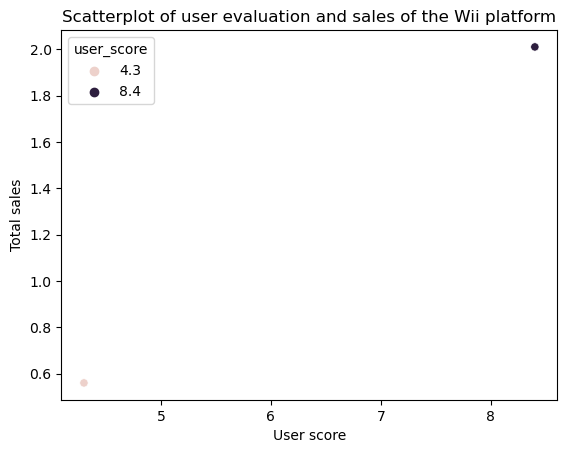

Correlation ratio: 1.0


In [41]:
wii_sales_user = (data_actual.query('platform == "Wii"')
              .pivot_table(index='user_score', values='total_sales', aggfunc='sum').reset_index()
             )
# строим диаграмму рассеяния
sns.scatterplot(data=wii_sales_user, x="user_score", y="total_sales", hue='user_score')
plt.title('Scatterplot of user evaluation and sales of the Wii platform')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()
# посчитаем корреляцию между оценкой пользователей и суммарными продажами
wii_user_corr = wii_sales_user['user_score'].corr(wii_sales_user['total_sales'])
print('Correlation ratio:', wii_user_corr)

<div style="border:solid green 2px; padding: 20px">
    
To interpret the correlation ratio, we will use the following gradation:

- 0 to 0.3 very weak;

- from 0.3 to 0.5 weak;

- from 0.5 to 0.7 average;

- from 0.7 to 0.9 high;

- from 0.9 to 1 very high.
    

Unfortunately, it is the critics' ratings of games on the Wii platform that are completely missing, and user ratings for the current period are insignificant - 4.3 and 8.4. The correlation could be called high, but we do not have enough data to make an adequate estimate.
    
Below we will analyze the remaining 4 platforms - PS4, XOne, WiiU and X360.

In [44]:
# make a summary table with critics' ratings and total sales of games on the WiiU platform
wiiu_sales = (data_actual.query('platform == "WiiU"')
              .pivot_table(index='critic_score', values='total_sales', aggfunc='sum').reset_index()
             )

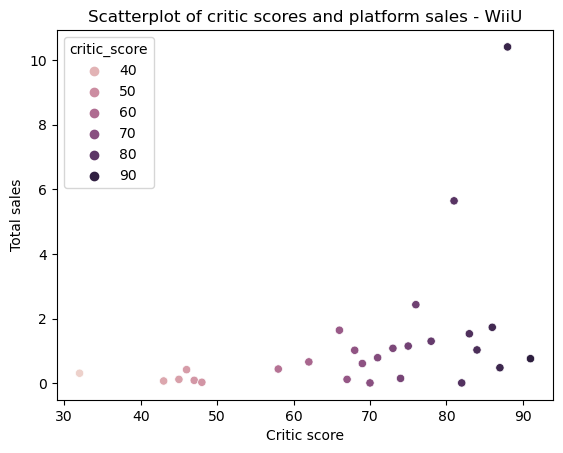

Correlation ratio: 0.4156476438408047


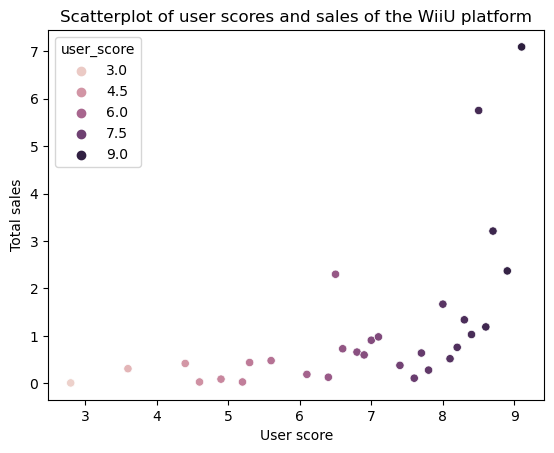

Correlation ratio: 0.5433229023551002


In [45]:
# create a scatterplot
sns.scatterplot(data=wiiu_sales, x="critic_score", y="total_sales", hue='critic_score')
plt.title('Scatterplot of critic scores and platform sales - WiiU')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between critics' scores and total sales
wiiu_corr = wiiu_sales['critic_score'].corr(wiiu_sales['total_sales'])

print('Correlation ratio:', wiiu_corr)

# make a pivot table with user scores
wiiu_sales_user = (data_actual.query('platform == "WiiU"')
              .pivot_table(index='user_score', values='total_sales', aggfunc='sum').reset_index()
             )
# create a scatterplot
sns.scatterplot(data=wiiu_sales_user, x="user_score", y="total_sales", hue='user_score')
plt.title('Scatterplot of user scores and sales of the WiiU platform')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between user scores and total sales
wiiu_user_corr = wiiu_sales_user['user_score'].corr(wiiu_sales_user['total_sales'])

print('Correlation ratio:', wiiu_user_corr)

<div style="border:solid green 2px; padding: 20px">
    
Compared to the Wii platform, its successor WiiU already has critical and user reviews. Moreover, the correlation according to critics' reviews is weak, and according to user reviews it is already strong.
    
But we would not draw any unambiguous conclusions on the dependence of reviews and total sales of this brand as a whole, since even the available indicators are low.

In [46]:
# make a summary table with critics' scores and total sales of games on PS4 platform
ps4_sales = (data_actual.query('platform == "PS4"')
              .pivot_table(index='critic_score', values='total_sales', aggfunc='sum').reset_index()
             )

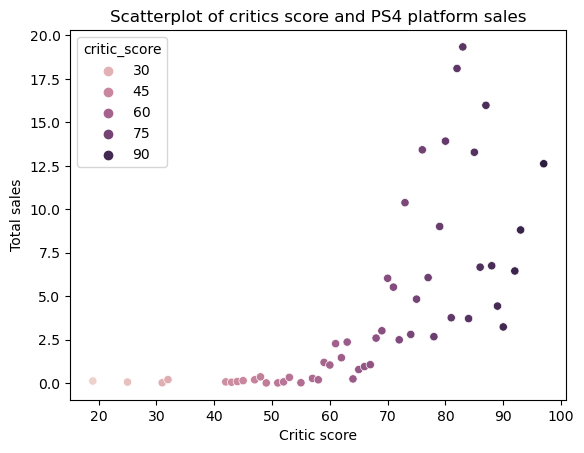

Correlation ratio: 0.6777894087959703


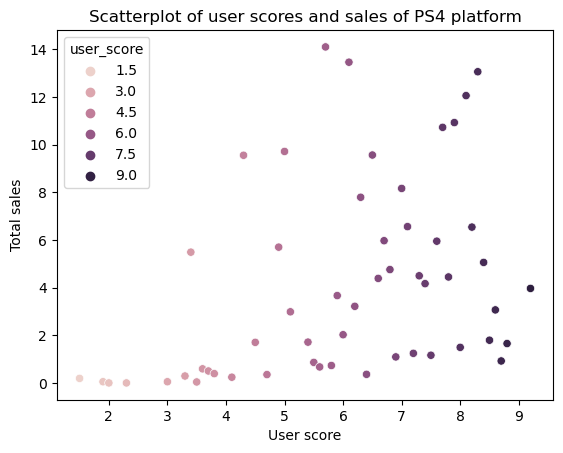

Correlation ratio: 0.38760903977699446


In [47]:
# create a scatterplot
sns.scatterplot(data=ps4_sales, x="critic_score", y="total_sales", hue='critic_score')
plt.title('Scatterplot of critics score and PS4 platform sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between critics' scores and total sales
ps4_corr = ps4_sales['critic_score'].corr(ps4_sales['total_sales'])

print('Correlation ratio:', ps4_corr)

# make a pivot table with user scores
ps4_sales_user = (data_actual.query('platform == "PS4"')
              .pivot_table(index='user_score', values='total_sales', aggfunc='sum').reset_index()
             )
# create a scatterplot
sns.scatterplot(data=ps4_sales_user, x="user_score", y="total_sales", hue='user_score')
plt.title('Scatterplot of user scores and sales of PS4 platform')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between user ratings and total sales
ps4_user_corr = ps4_sales_user['user_score'].corr(ps4_sales_user['total_sales'])

print('Correlation ratio:', ps4_user_corr)

<div style="border:solid green 2px; padding: 20px">
    
Based on the results of the analysis we see that the correlation between critic scores and total sales of the PS4 platform is average, almost high. The correlation of user scores is low.
    
Such values could be influenced by marketing campaigns in connection with the release of a new version of the platform to the market, respectively, a large number of reviews from critics appear.

In [48]:
# make a pivot table with critics' scores and total sales of games on XOne platform
xone_sales = (data_actual.query('platform == "XOne"')
              .pivot_table(index='critic_score', values='total_sales', aggfunc='sum').reset_index()
             )

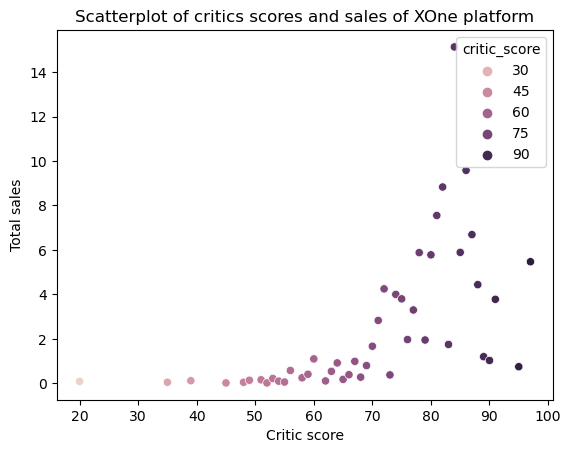

Correlation ratio: 0.586562839692841


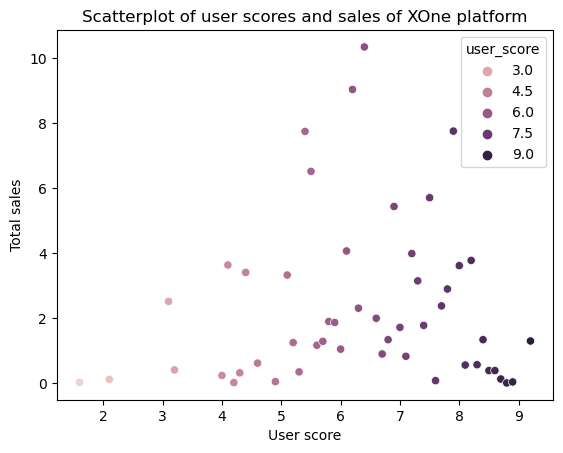

Correlation ratio 0.06664117326540234


In [49]:
# create a scatterplot
sns.scatterplot(data=xone_sales, x="critic_score", y="total_sales", hue='critic_score')
plt.title('Scatterplot of critics scores and sales of XOne platform')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between critics' scores and total sales
xone_corr = xone_sales['critic_score'].corr(xone_sales['total_sales'])

print('Correlation ratio:', xone_corr)

# make a pivot table with user scores
xone_sales_user = (data_actual.query('platform == "XOne"')
              .pivot_table(index='user_score', values='total_sales', aggfunc='sum').reset_index()
             )
# create a scatterplot
sns.scatterplot(data=xone_sales_user, x="user_score", y="total_sales", hue='user_score')
plt.title('Scatterplot of user scores and sales of XOne platform')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between user ratings and total sales
xone_user_corr = xone_sales_user['user_score'].corr(xone_sales_user['total_sales'])

print('Correlation ratio', xone_user_corr)

<div style="border:solid green 2px; padding: 20px">
    
The correlation on critics' score is quite high, while the correlation on users' score is low, insignificant.
    
This may be due again to the recent release of the platform, when we first receive reviews from critics, and only after some time from users. In addition, some of the fans of this platform could still be with the previous version of the X360.

In [50]:
# make a summary table with critics' score and total sales of games on the X360 platform
x360_sales = (data_actual.query('platform == "X360"')
              .pivot_table(index='critic_score', values='total_sales', aggfunc='sum').reset_index()
             )

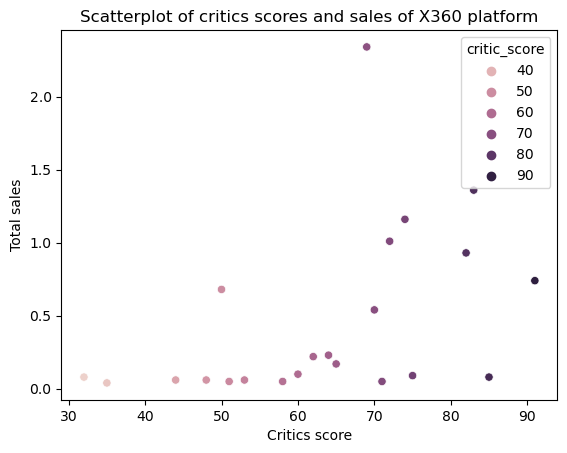

Correlation ratio: 0.4488734816163276


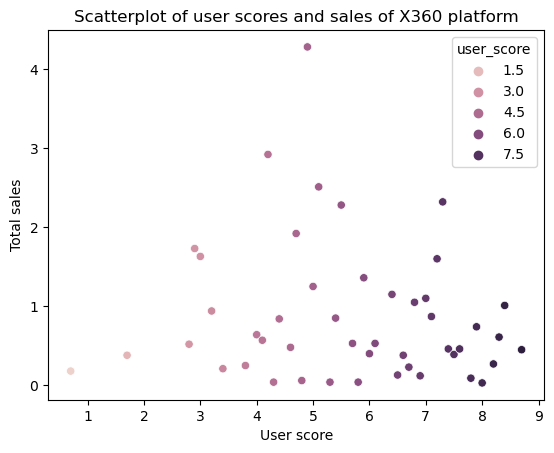

Correlation ratio: -0.10903971230630075


In [51]:
# create a scatterplot
sns.scatterplot(data=x360_sales, x="critic_score", y="total_sales", hue='critic_score')
plt.title('Scatterplot of critics scores and sales of X360 platform')
plt.xlabel('Critics score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between critics' scores and total sales
x360_corr = x360_sales['critic_score'].corr(x360_sales['total_sales'])

print('Correlation ratio:', x360_corr)

# make a pivot table with user scores
x360_sales_user = (data_actual.query('platform == "X360"')
              .pivot_table(index='user_score', values='total_sales', aggfunc='sum').reset_index()
             )
# create a scatterplot
sns.scatterplot(data=x360_sales_user, x="user_score", y="total_sales", hue='user_score')
plt.title('Scatterplot of user scores and sales of X360 platform')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()
# calculate the correlation between user scores and total sales
x360_user_corr = x360_sales_user['user_score'].corr(x360_sales_user['total_sales'])

print('Correlation ratio:', x360_user_corr)

<div style="border:solid green 2px; padding: 20px">
    
The previous X360 platform also did not show a high correlation in user scores, however, it has a low but close to average correlation ratio in critic scores.

### Distribution of games by genre

<div style="border:solid green 2px; padding: 20px">
    
Let's check the distribution of games by genre.

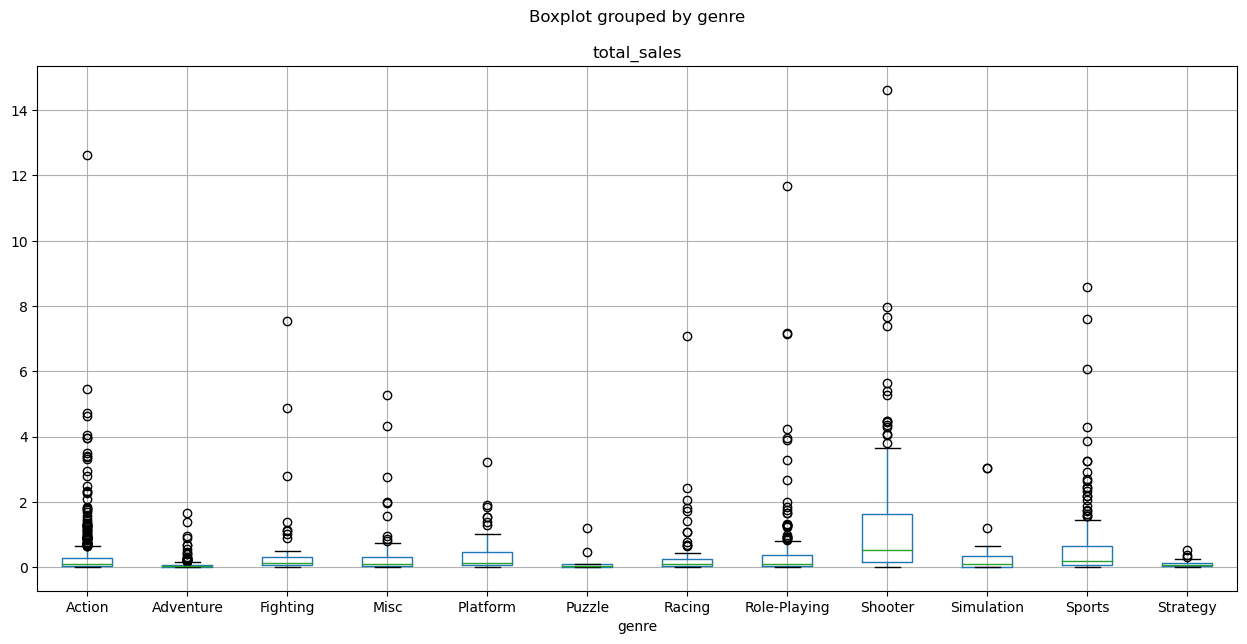

In [52]:
data_actual.boxplot('total_sales', by='genre', figsize=(15,7))
plt.show()

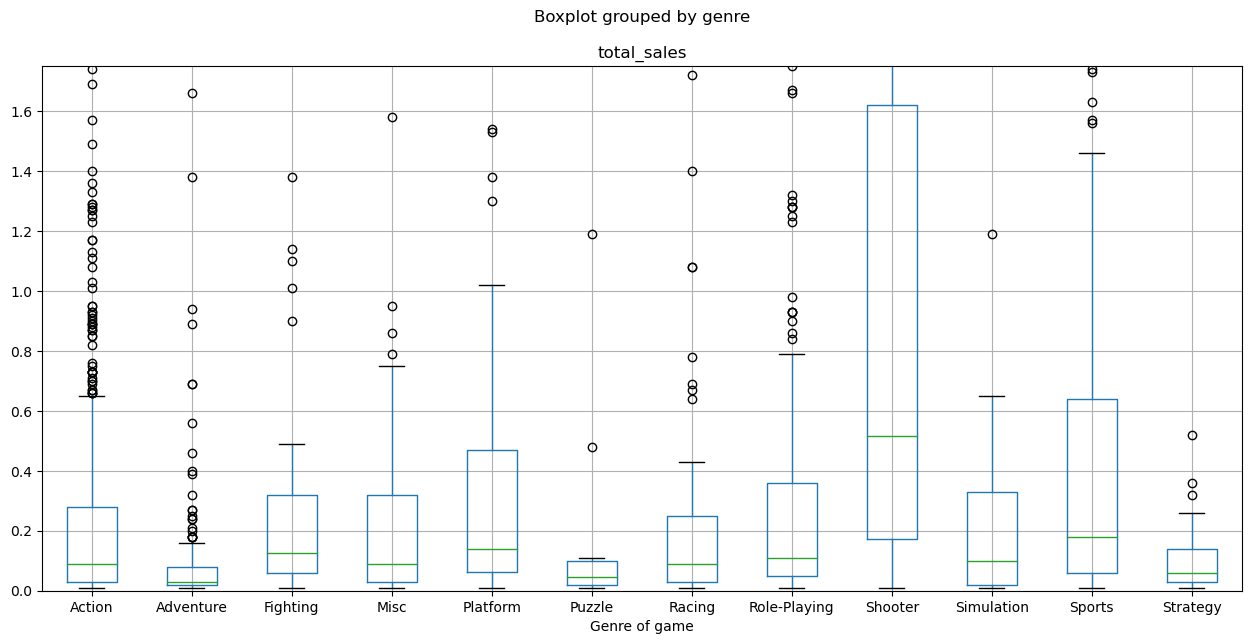

In [53]:
data_actual.boxplot('total_sales', by='genre', figsize=(15,7))
plt.xlabel('Genre of game')
plt.ylim(0, 1.75)
plt.show()

Top-5 genres in total sales are `Shooter`, `Sports`, `Platform`, `Role-Playing` and `Simulation`.
    
The biggest sales are in the `Shooter` genre, and the median value of sales of this genre is distinguished by its high performance - just over 500 thousand copies. When, on average, other genres have a median of up to 200,000.
    
Among the most unpopular genres were `Puzzle`, `Adventure` and `Strategy`.

##  User portrait by region

<div style="border:solid green 2px; padding: 20px">

Define for the user of each region (NA - North America, EU - Europe, JP - Japan):
    
* Most popular platforms (top-5)
* Most popular genres (top-5)
* Find out if the ESRB rating affects sales in a particular region

### Top-5 platforms by region

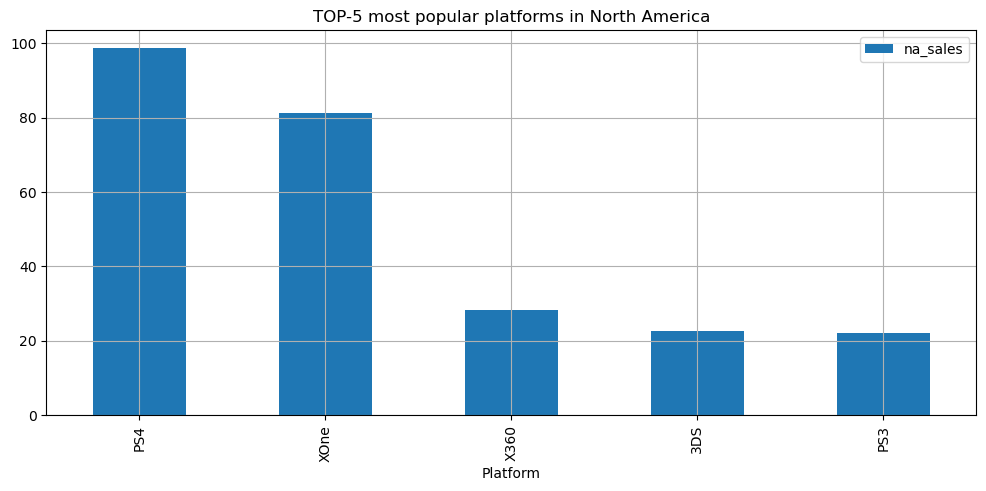

In [54]:
# make a pivot table on sales of platforms in North America
na_sales_stat = (data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().
                 sort_values(by='na_sales', ascending=False).head().reset_index(drop=True)
                )
# display top-5 platforms
na_sales_stat.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(12,5), grid=True, \
                   title = 'TOP-5 most popular platforms in North America')
plt.xlabel('Platform')
plt.show()

In [55]:
# calculate the total sales for the North American market
na_total_sales = data_actual['na_sales'].sum().round(2)
print('Total sales in North America', na_total_sales, 'million copies')

Total sales in North America 284.06 million copies


In [56]:
# calculate the sales shares of the top-5 platforms in North America
na_sales_stat['na_percent'] = (na_sales_stat['na_sales']/na_total_sales *100).round(2)
na_sales_stat

,platform,na_sales,na_percent
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,X360,28.30,9.96
3,3DS,22.64,7.97
4,PS3,22.05,7.76


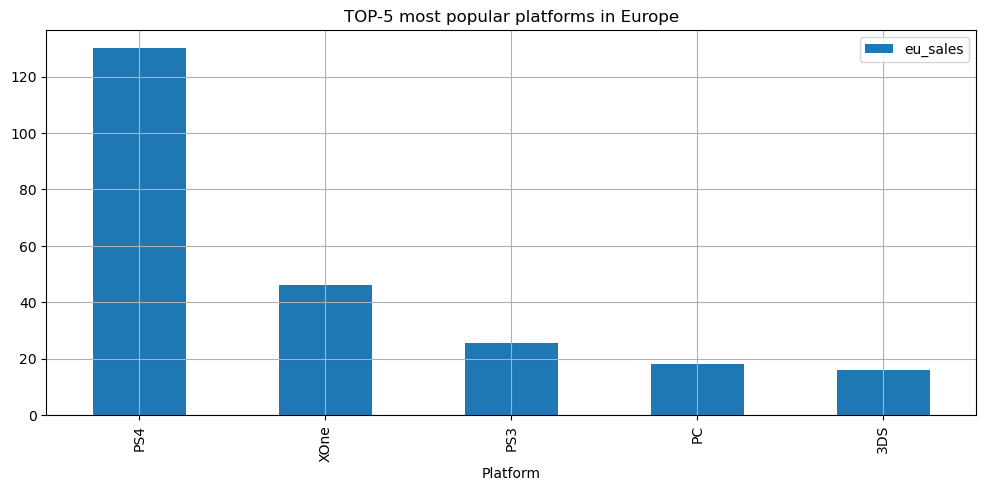

In [57]:
# make a pivot table on platform sales in Europe
eu_sales_stat = (data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().
                 sort_values(by='eu_sales', ascending=False).head().reset_index(drop=True)
                )
# display top-5 platforms
eu_sales_stat.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(12,5), grid=True, \
                   title = 'TOP-5 most popular platforms in Europe')
plt.xlabel('Platform')
plt.show()

In [59]:
# calculate the total sales in the European market
eu_total_sales = data_actual['eu_sales'].sum().round(2)
print('Total sales in Europe', eu_total_sales, 'millions copies')

Total sales in Europe 270.68 millions copies


In [60]:
# calculate the sales shares of the top-5 platforms in Europe
eu_sales_stat['eu_percent'] = (eu_sales_stat['eu_sales']/eu_total_sales *100).round(2)
eu_sales_stat

,platform,eu_sales,eu_percent
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,PS3,25.54,9.44
3,PC,17.97,6.64
4,3DS,16.12,5.96


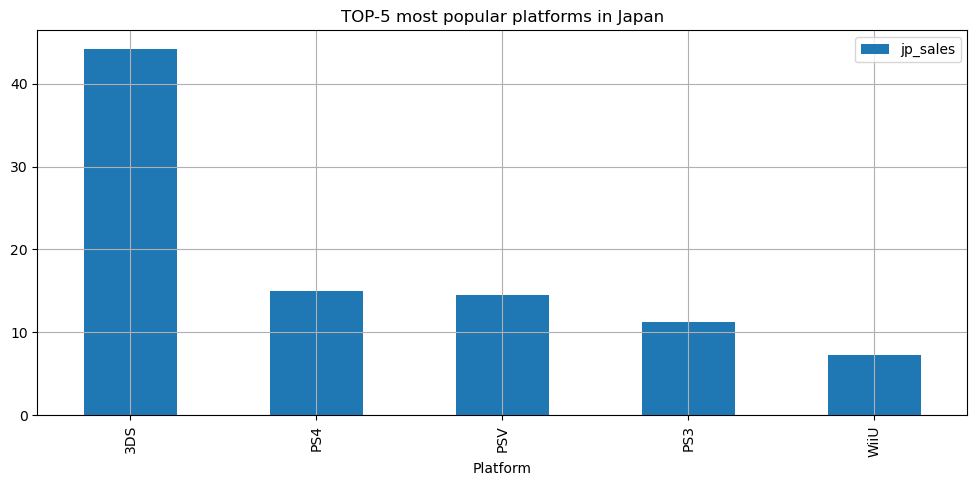

In [61]:
# make a pivot table on platform sales in Japan
jp_sales_stat = (data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().
                 sort_values(by='jp_sales', ascending=False).head().reset_index(drop=True)
                )
# display top-5 platforms
jp_sales_stat.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(12,5), grid=True, \
                   title = 'TOP-5 most popular platforms in Japan')
plt.xlabel('Platform')
plt.show()

In [62]:
# calculate the total sales in Japanese market
jp_total_sales = data_actual['jp_sales'].sum().round(2)
print('Total sales in Japan', jp_total_sales, 'millions copies')

Total sales in Japan 93.09 millions copies


In [63]:
# calculate the sales shares of the top-5 platforms in Japan
jp_sales_stat['jp_percent'] = (jp_sales_stat['jp_sales']/jp_total_sales *100).round(2)
jp_sales_stat

,platform,jp_sales,jp_percent
0,3DS,44.24,47.52
1,PS4,15.02,16.13
2,PSV,14.54,15.62
3,PS3,11.22,12.05
4,WiiU,7.31,7.85


<div style="border:solid green 2px; padding: 20px">
    
The top sellers in North America were PS4 and XOne with sales shares of 35% and 29% respectively.

The absolute sales leader in Europe - PS4 - 48% - almost half of the entire market.
    
In Japan, a clear preference is given to games on the 3DS platform - 47.5% of the total sales market. Which is quite interesting, since the platform was simultaneously announced in early 2011 in both North America and Europe, as well as in Japan. But in North America and Japan, this platform is not popular.

### Top-5 game genres by region

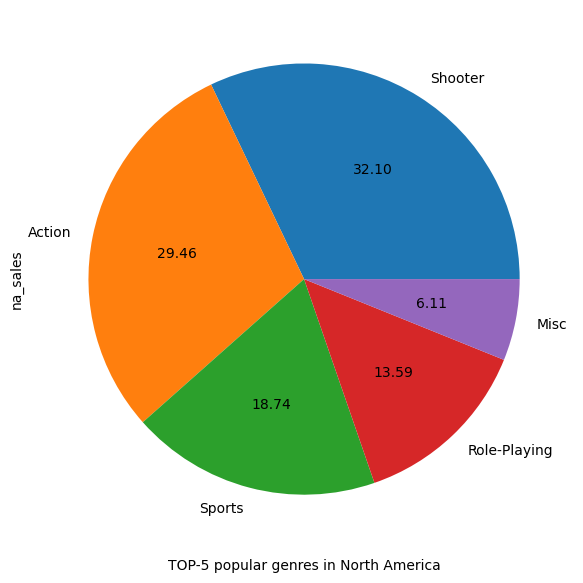

In [64]:
# make a pivot table by genres in North America
na_genres_stat = (data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                  .sort_values(by='na_sales', ascending=False).head()
                 )
# display top-5 platforms
na_genres_stat.plot.pie(x='genre', y='na_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular genres in North America')
plt.show()

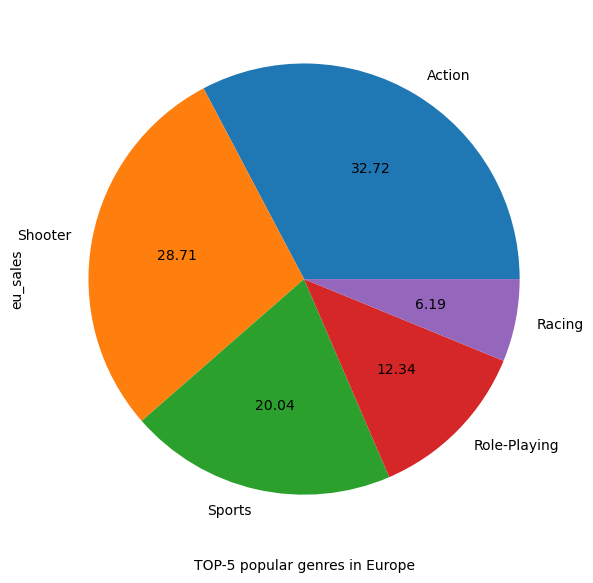

In [65]:
# make a pivot table by genres in Europe
eu_genres_stat = (data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                  .sort_values(by='eu_sales', ascending=False).head()
                 )
# display top-5 platforms
eu_genres_stat.plot.pie(x='genre', y='eu_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular genres in Europe')
plt.show()

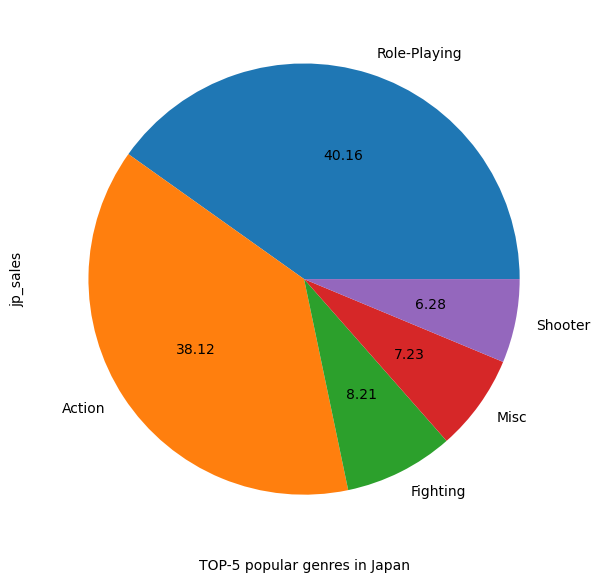

In [66]:
# make a pivot table by genre in Japan
jp_genres_stat = (data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                  .sort_values(by='jp_sales', ascending=False).head()
                 )
# display top-5 platforms
jp_genres_stat.plot.pie(x='genre', y='jp_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular genres in Japan')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
We see a significant diversity by genre preferences.
    
For example, in North America users prefer Shooter and Action games.
    
In Europe users are also big fans of these genres, but the share of the Sports genre is slightly higher than in North America.
    
In Japan the leader among the genres is Role-Playing, followed by Action. All other genres are preferred in the smallest shares.
    
There is a rather interesting fact that in Japanese culture, gaming is an absolutely normal leisure activity. And entering the game just to level up your hero is a common action. Perhaps this just explains the nature of such a difference in genres. 

### Impact of the ESRB rating on sales in a particular region

In [67]:
# for completeness (so that we take into account sales of games not rated by the ESRB), 
# replace the NaN values in the column with unknown values
data['rating'] = data['rating'].fillna(value='unknown')
data_actual = data.query('year_of_release >= 2014')

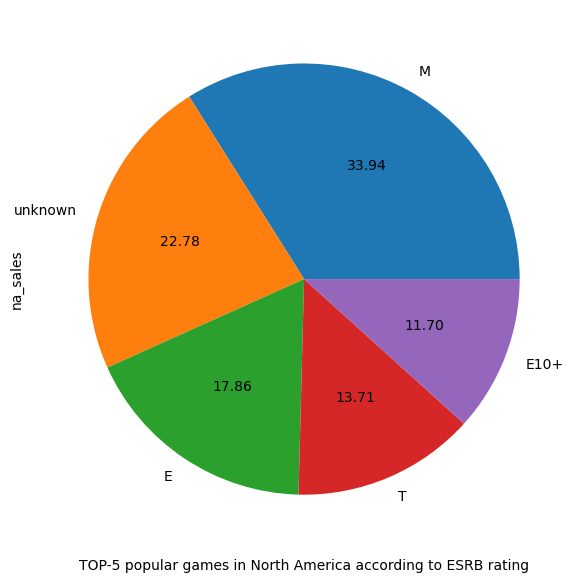

In [68]:
# make a pivot table of game sales in North America depending on the ESRB rating
na_esrb_stat = (data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False).head()
                )
# create a diagram of the distribution of genres
na_esrb_stat.plot.pie(x='rating', y='na_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular games in North America according to ESRB rating')
plt.show()

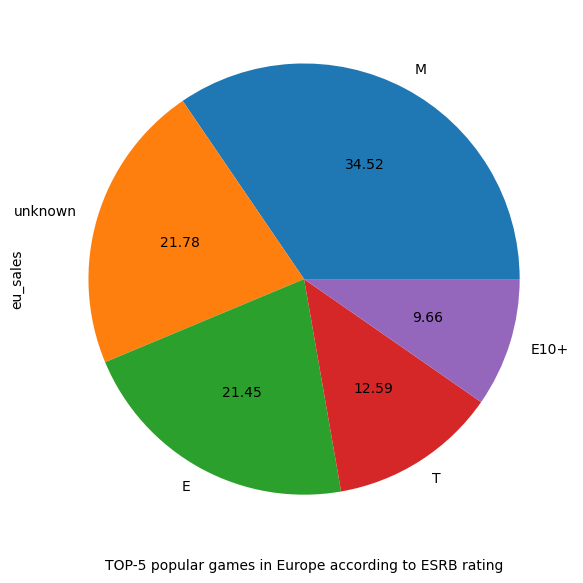

In [69]:
# make a pivot table of game sales in Europe depending on the ESRB rating
eu_esrb_stat = (data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False).head()
                )
# create a diagram of the distribution of genres
eu_esrb_stat.plot.pie(x='rating', y='eu_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular games in Europe according to ESRB rating')
plt.show()

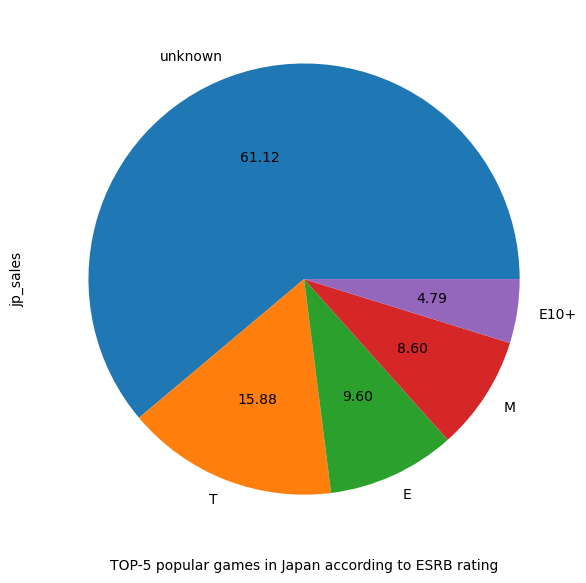

In [70]:
# make a pivot table of game sales in Japan depending on the ESRB rating
jp_esrb_stat = (data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False).head()
                )
# create a diagram of the distribution of genres
jp_esrb_stat.plot.pie(x='rating', y='jp_sales', figsize=(15, 7), legend=False, autopct="%.2f")
plt.xlabel('TOP-5 popular games in Japan according to ESRB rating')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
Recall the rating categories:

'E' - game without age limit
'M' - game with age limit 17+
'T' - game with age limit 13+
'E10+' - 10+ game (previously rated 'K-A')
'AO' - "adults only" - game with age limit 18+
'EC' - a game for preschool children (this rating has not been awarded since 2018)
'RP' - the game has not yet been rated by the ESRB
'unknown' - the rating is not in the data
    
In North America and Europe, 'M' rated games lead the way - 17+ games. Further, a significant share (more than 20%) is occupied by games whose rating is not indicated, and games with an 'E' rating (no age restrictions) are in third place.
    
Japan excels here as well - over 60% for unrated games, followed by 13+ games, followed by games with no age limits.
    
It can be assumed that the gaming culture in Japan is generally more widespread, given the widespread use of the 3DS, which is portable (you can take it everywhere with you).
    
The smallest category in all regions is 'E10+' - a game with an age limit of 10+.

##  Hypothesis testing

<div style="border:solid green 2px; padding: 20px">

Hypothesis testing begins with the formulation of the null hypothesis H_0.

Accordingly, if we have, for example, the task of finding out whether the user scores of two platforms are the same, we can formulate the null hypothesis as "the average user score of platform A is equal to the average user score of platform B".
    
Based on H_0, we can formulate an alternative hypothesis H_1. This is the statement that is assumed to be true if H_0 is discarded. 
    
For example, "Average user score for platform A is not equal to average user score for platform B".
    
In our case the hypothesis about checking the equality of the mean of two general populations becomes more relevant, so we will use the method `scipy.stats.ttest_ind (array1, array2, equal_var)`.
    
We can use this method because:

1. general populations are independent of each other (user scores of different platforms or genres, if they have an impact, then the most minimal, but with a greater degree of probability, they do not affect each other).
    
2. sample means are normally distributed (due to the CLT, sample means that can be obtained from the same population will be distributed normally around the true mean of this population)
    
3. the variances of the considered populations are equal (but we can additionally specify `equal_var = False` to have the test calculate the sample variances separately).

**Hypothesis 1.** The average user scores of the Xbox One and PC platforms are the same.
      

H_0: Average `user_score` Xbox One platform = average `user_score` PC platform    
H_a: Average `user_score` Xbox One platform ≠ average `user_score` PC platform    

alpha = 0.05 


In [71]:
# create a selection with the condition of using the Xbox One platform
user_xone_total = data_actual[data_actual['platform'] == 'XOne']['user_score']
# check the number of gaps
user_xone_total.isna().sum()

63

In [72]:
# for further calculations, we should not replace the gaps with the median value, 
# so as not to distort the information, but we cannot leave NaN either. So let's get rid of the missing values
user_xone_total = user_xone_total.dropna()

In [73]:
# do the same actions for users of the PC platform
user_pc_total = data_actual[data_actual['platform'] == 'PC']['user_score']
user_pc_total.isna().sum()

29

In [74]:
user_pc_total = user_pc_total.dropna()

In [75]:
# results = calling a method to test a hypothesis
results = st.ttest_ind(user_xone_total, user_pc_total, equal_var=False)
# alpha - level of significance
alpha = .05
# display p-value 
print('p-значение:', results.pvalue)
# conditional statement with the output of a string with the answer
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Hypothesis 2.** Average user scores of Action and Sports genres are different. 
              
H_0: Average user scores of Action = Average user scores of Sports    

H_a: Average user scores of Action ≠ Average user scores of Sports   

alpha = 0.05 

In [76]:
# create a selection with users which choose Action games
user_action_total = data_actual[data_actual['genre'] == 'Action']['user_score']
# check the gaps
user_action_total.isna().sum()

322

In [77]:
user_action_total = user_action_total.dropna()

In [78]:
# create a selection with users which choose Sports games
user_sports_total = data_actual[data_actual['genre'] == 'Sports']['user_score']
# check the gaps
user_sports_total.isna().sum()

34

In [79]:
user_sports_total = user_sports_total.dropna()

In [81]:
# results = calling a method to test a hypothesis
results = st.ttest_ind(user_action_total, user_sports_total, equal_var=False)
# alpha - level of significance
alpha = .05
# display p-value 
print('p-значение:', results.pvalue)
# conditional statement with the output of a string with the answer
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


##  Conclusion

<div style="border:solid green 2px; padding: 20px">
 
    
**Our goal was data pre-processing, research and statistical analysis, so that our online store could plan an advertising campaign for 2017 using our analysis for the current period.**
    
    
For the analysis we chose the period 2014-2016, taking into account the presence of several peaks in sales, as well as the release of new versions of platforms while the previous versions are still relevant.
    
    
Overall conclusion:
    
    
- active growth of releases falls on 2005, the number of releases is gradually increased, but in 2012 we see a decline by almost 2 times.
   
    
- top-5 leaders among platforms in the current period are Wii, WiiU, PS4, X360 and XOne.
    
    
- Wii platforms and the new PS4 stand out in terms of sales volumes, followed by the XOne (X360's successor) and WiiU.
    
    
- critics' and users' scores, however, do not affect the popularity of all platforms. On the Wii platform they are generally absent. The correlation between critic scores on the PS4 and XOne platforms is average and tends to be high. Therefore, we can recommend giving preference to advertising campaigns of these platforms.
    
    
- top-5 genres were Shooter, Sports, Platform, Role-Playing and Simulation. Accordingly, in 2017 it is possible to focus on advertising campaigns for games of these genres. For Japan advertising of games of the Role-Playing genre is undoubtedly recommended, for North America and Europe - Shooter and Action.
    
    
- games without age restrictions are popular, but games with 13+ restrictions can also be recommended for advertising campaigns.
Meanwhile, there are still a large number of games without a certain rating, and in Japan users prefer this kind of games. Additional data may be needed for a more complete rating analysis. 
    
    
- in general, we see a trend of a smooth transition of users from platforms of old versions to new ones, in comparison with Wii and WiiU, as well as X360 and XOne.
    
In this regard, we can give a recommendation to leave a small part of advertising campaigns behind the old, but popular platforms.
    
Hypothesis testing was also part of our analysis. Based on the results of the test we found that:
    
    
1. we cannot claim that the average user scores of the Xbox One platform are not equal to the average user scores of the PC platform. Their average values are close to each other.
    
    
2. we cannot say that the average user scores of the Action genres are equal to the average user scores of the Sports genre, since it is more likely that the ratings of these genres differ significantly from each other.
    
    
Based on this you can also stay with our recommendation to give preference to Sports advertising companies, as well as follow the releases of new platforms among the PlayStation and Xbox, in order to understand when to start advertising campaigns for new versions of games, and which games of old versions still need to be sold before the peak of sales of the new platform.
